In [ ]:
#clase4 ejercicio1
#para las imagenes a color son tridimensionales
#para las imagenes en blanco y negro son bidimensionales
import numpy as np
import pandas as pd
from PIL import Image
img = Image.open('imagen2.jpg')
print(img.format)
print(img.size)
print(img.mode)
img.show()
print("testing")
gray_img = img.convert("L")
gray_img.show()
print(gray_img.format)
print(gray_img.size)
print(gray_img.mode)
gray_img.save("gray_imagen2.jpg")

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
matA = np.random.randint(0,255,(128,128),dtype= np.uint8)
print(matA)
img = Image.fromarray(matA,mode="L")
img.save("custom.png")

In [16]:
import numpy as np
from PIL import Image

matB = np.full((9, 9), 255, dtype=np.uint8)


for i in range(9):
    matB[i, i] = 0 
    matB[i, 8 - i] = 0  

img = Image.fromarray(matB, mode="L")
img.save("imagen_9x9.png")
img.show()

C:\Users\Rod-0310\AppData\Local\Temp\ipykernel_4460\3015404001.py:11: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(matB, mode="L")


In [17]:
import numpy as np
from PIL import Image

# Definir el tamaño de la imagen (puedes cambiar este valor)
size = 15  # Cambia este valor para generar una imagen de tamaño diferente

# Crear una matriz cuadrada del tamaño especificado, inicializada en blanco (255)
matB = np.full((size, size), 255, dtype=np.uint8)

# Dibujar la "X" en la matriz
for i in range(size):
    matB[i, i] = 0  # Diagonal principal (negro)
    matB[i, size - 1 - i] = 0  # Diagonal secundaria (negro)

# Convertir la matriz en una imagen en escala de grises
img = Image.fromarray(matB, mode="L")
img.save(f"x_image_{size}x{size}.png")  # Guardar la imagen con el tamaño en el nombre
img.show()
'''
un kernel es una matriz mas pequena donde esta sufre una transformacion 
'''

C:\Users\Rod-0310\AppData\Local\Temp\ipykernel_4460\3994100766.py:16: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(matB, mode="L")


In [31]:

from PIL import Image
import numpy as np

img2 = Image.open("gray_imagen2.jpg")
img2_new = np.array(img2)

brillo = -50

brillo = max(-255, min(255, brillo))

img2_brillo = np.clip(img2_new + brillo, 0, 255).astype(np.uint8)

img2_brillo_img = Image.fromarray(img2_brillo, mode="L")

img2_brillo_img.save("gray_imagen2_brillo.jpg")
img2_brillo_img.show()

C:\Users\Rod-0310\AppData\Local\Temp\ipykernel_4460\3511856367.py:13: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img2_brillo_img = Image.fromarray(img2_brillo, mode="L")


In [ ]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros que puedes ajustar ---
PERCENTIL = 88     # 80-95 suele ir bien. Más alto = máscara más pequeña
BLUR = 2           # radio de desenfoque para suavizar la máscara (1-3)
# -------------------------------------

# Abrir imagen
img = Image.open("imagen_clase6.jpg").convert("RGB")
color_array = np.array(img)

# Escala de grises
gray_img = img.convert("L")
gray_array = np.array(gray_img)

# Dimensiones
h, w = gray_array.shape

# Crear coordenadas (x,y) y término independiente (sesgo)
Y, X = np.indices((h, w))
coords = np.column_stack((X.ravel(), Y.ravel(), np.ones(h*w)))
intensity = gray_array.ravel()

# Regresión lineal con NumPy (fondo aproximado)
coef, _, _, _ = np.linalg.lstsq(coords, intensity, rcond=None)
pred = coords @ coef

# Residuos (diferencia entre intensidad real y modelo)
residuals = np.abs(intensity - pred).reshape(h, w)

# Umbral automático por percentil
th = np.percentile(residuals, PERCENTIL)
mask = (residuals > th).astype(np.uint8) * 255

# Suavizar máscara para quitar ruido/bordes duros
mask_img = Image.fromarray(mask).filter(ImageFilter.GaussianBlur(BLUR))
mask = np.array(mask_img)

# Composición: fondo gris, manzana en color
bg_gray_rgb = np.stack([gray_array]*3, axis=-1)
highlight = bg_gray_rgb.copy()
highlight[mask > 127] = color_array[mask > 127]

# Mostrar
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.title("Original"); plt.imshow(color_array); plt.axis("off")
plt.subplot(1,3,2); plt.title(f"Máscara (p>{PERCENTIL}%)"); plt.imshow(mask, cmap="gray"); plt.axis("off")
plt.subplot(1,3,3); plt.title("Manzana resaltada"); plt.imshow(highlight); plt.axis("off")
plt.tight_layout()
plt.show()

# Guardar resultado
Image.fromarray(highlight).save("manzana_resaltada.png")


In [5]:
import cv2
img =cv2.imread('imagen_clase6.jpg',0)# 0 es grayscae  1 es color
#REDIMENSIONAR
resized_img = cv2.resize(img,(1000,1000))
#ROTAR
rotated_img = cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE)
#DIFUMINAR
blurred_img = cv2.GaussianBlur(resized_img,(5,5),0)
print("hola")
#TRANSFORMACIONES GEOMETRICAS
#redimensionar
cv2.imshow('Imagen_manzana',resized_img)
#rotar
cv2.imshow('Imagen rotada',rotated_img)
#difuminar
cv2.imshow('Imagen borrosa',blurred_img)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('imagen_clase6_copia.jpg',resized_img)#garda la imagen en el mismo formato que se abrio

#cv2.imshow('Imagen rotada',rotated_img)
#cv2.imshow('Imagen borrosa',blurred_img)
#print("shape",img.shape)# dimensiones
#print("size",img.size)# cantidad de pixeles
#print("dtype",img.dtype)# tipo de dato
#print"pixeles",img[100,100])# valor del pixel en la posicion 100,100 bgr 0-255 



hola


True

C:\Users\Rod-0310\AppData\Local\Temp\ipykernel_10848\2281577301.py:5: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.ravel(),256,[0,256])


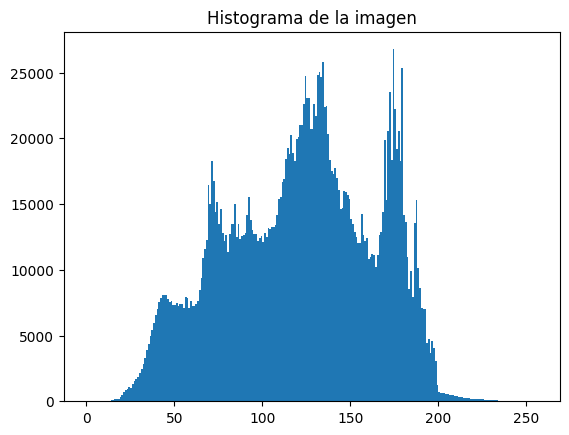

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2  # OpenCV
img = cv2.imread('imagen_clase6.jpg',0)
plt.hist(img.ravel(),256,[0,256])
plt.title('Histograma de la imagen')
plt.show()


In [ ]:
# ====== 0) Importar librerías ======
import cv2                  # OpenCV para imágenes
import numpy as np          # Numpy para operaciones numéricas
import matplotlib.pyplot as plt  # Para mostrar imágenes y gráficos

# Función cortita para mostrar varias imágenes en fila
def mostrar_fila(imagenes, titulos, cmap='gray', figsize=(14,4)):
    plt.figure(figsize=figsize)
    for i, img in enumerate(imagenes):
        plt.subplot(1, len(imagenes), i+1)
        plt.imshow(img, cmap=cmap, vmin=0, vmax=255)
        plt.title(titulos[i]); plt.axis('off')
    plt.show()

# ====== 1) Cargar imagen en escala de grises ======
# OJO: Cambia el nombre por tu imagen. Si el resultado es None, la ruta está mal.
img = cv2.imread("mi_imagen.jpg", cv2.IMREAD_GRAYSCALE)
assert img is not None, "No se pudo cargar la imagen. Revisa el nombre o la ruta."

# --- Versiones: más brillante, más oscura, alto contraste ---
# convertScaleAbs aplica: salida = alpha * img + beta, con límites 0..255
brighter = cv2.convertScaleAbs(img, alpha=1.0, beta=+50)   # + brillo
darker   = cv2.convertScaleAbs(img, alpha=1.0, beta=-50)   # - brillo
high_ct  = cv2.convertScaleAbs(img, alpha=2.0, beta=0)     # + contraste

mostrar_fila([img, brighter, darker, high_ct],
             ["Original", "Brighter (+50)", "Darker (-50)", "High Contrast (α=2, β=0)"])

# ====== 2) Transformación negativa (invertir intensidades) ======
# Fórmula: nuevo = 255 - viejo
negative = 255 - img
mostrar_fila([img, negative], ["Original", "Negative"])

# ====== 3) Transformación logarítmica (resalta zonas oscuras) ======
# Usamos un factor 'c' para escalar al rango 0..255
c = 255 / np.log(1 + np.max(img))
log_img = c * np.log(1 + img.astype(np.float32))
log_img = np.clip(log_img, 0, 255).astype(np.uint8)

mostrar_fila([img, log_img], ["Original", "Log Transform"])

# ====== 4) Corrección Gamma (iluminar u oscurecer no lineal) ======
# Si gamma < 1 aclara, si gamma > 1 oscurece
def gamma_correction(image, gamma):
    invG = 1.0 / gamma
    # Tabla de mapeo 0..255 -> 0..255
    table = (np.arange(256) / 255.0) ** invG * 255.0
    table = np.clip(table, 0, 255).astype(np.uint8)
    return cv2.LUT(image, table)

gamma05 = gamma_correction(img, 0.5)
gamma15 = gamma_correction(img, 1.5)
gamma20 = gamma_correction(img, 2.0)

mostrar_fila([gamma05, gamma15, gamma20], ["Gamma 0.5 (aclara)", "Gamma 1.5", "Gamma 2.0"])

# ====== 5) Ecualización de Histograma (mejora contraste global) ======
# 5.1) Ver histograma de la imagen "de bajo contraste" (usaremos la original)
def mostrar_hist(im, titulo):
    # histograma con 256 bins en el rango [0,256)
    hist = cv2.calcHist([im],[0],None,[256],[0,256])
    plt.figure(figsize=(5,3))
    plt.plot(hist); plt.title(titulo)
    plt.xlabel("Intensidad (0-255)"); plt.ylabel("Frecuencia")
    plt.xlim([0,255]); plt.show()

mostrar_hist(img, "Histograma (Original)")

# 5.2) Aplicar ecualización y ver nueva imagen + nuevo histograma
eq = cv2.equalizeHist(img)
mostrar_fila([img, eq], ["Original", "Equalized"])
mostrar_hist(eq, "Histograma (Equalized)")


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("contraste.jpeg", cv2.IMREAD_GRAYSCALE)

# Versiones modificadas
brighter = cv2.convertScaleAbs(img, alpha=1, beta=50)  # más brillante
darker = cv2.convertScaleAbs(img, alpha=1, beta=-50)   # más oscura
high_contrast = cv2.convertScaleAbs(img, alpha=2.0, beta=0)  # alto contraste

# Mostrar imágenes lado a lado
plt.figure(figsize=(12, 6))
plt.subplot(1,4,1); plt.imshow(img, cmap='gray'); plt.title("Original")
plt.subplot(1,4,2); plt.imshow(brighter, cmap='gray'); plt.title("Brighter +50")
plt.subplot(1,4,3); plt.imshow(darker, cmap='gray'); plt.title("Darker -50")
plt.subplot(1,4,4); plt.imshow(high_contrast, cmap='gray'); plt.title("High Contrast")
plt.show()

# ============= 2. Transformación negativa =================
negative = 255 - img
plt.imshow(negative, cmap='gray')
plt.title("Negative Transformation")
plt.show()

# ============= 3. Transformación logarítmica =================
c = 255 / np.log(1 + np.max(img))
log_transformed = c * (np.log(img + 1))
log_transformed = np.array(log_transformed, dtype=np.uint8)

plt.imshow(log_transformed, cmap='gray')
plt.title("Log Transformation")
plt.show()

# ============= 4. Corrección Gamma =================
def gamma_correction(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

gammas = [0.5, 1.5, 2.0]
plt.figure(figsize=(12,4))
for i, g in enumerate(gammas):
    gamma_img = gamma_correction(img, g)
    plt.subplot(1,3,i+1)
    plt.imshow(gamma_img, cmap='gray')
    plt.title(f"Gamma {g}")
plt.show()

# ============= 5. Histogram Equalization =================
low_contrast = img  # Puedes usar la misma o una imagen oscura
hist = cv2.calcHist([low_contrast],[0],None,[256],[0,256])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(low_contrast, cmap='gray')
plt.title("Low Contrast Image")

plt.subplot(1,2,2)
plt.plot(hist)
plt.title("Histogram (Low Contrast)")
plt.xlabel("Intensidad de píxel")
plt.ylabel("Frecuencia")
plt.show()

# Aplicar equalización de histograma
equalized = cv2.equalizeHist(low_contrast)
eq_hist = cv2.calcHist([equalized],[0],None,[256],[0,256])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(equalized, cmap='gray')
plt.title("Equalized Image")

plt.subplot(1,2,2)
plt.plot(eq_hist)
plt.title("Histogram (Equalized)")
plt.xlabel("Intensidad de píxel")
plt.ylabel("Frecuencia")
plt.show()


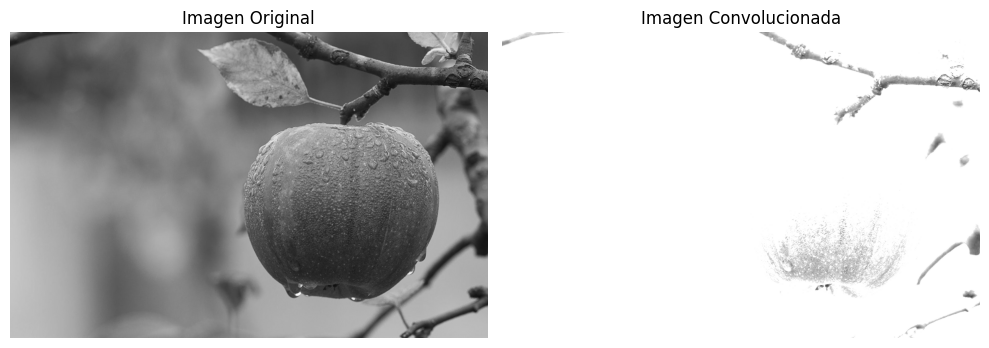

True

In [ ]:
#clase 8 lp 04-09-2025
'''
un kerel es una matriz mas pequena donde esta sufre una transformacion, es decir un filtro 
pading asimetrico y simetrico 
la correlacion es una operacion matematica que se aplica a dos funciones para obtener una tercera funcion que expresa como la forma de una es modificada por la otra
la convolucion es una operacion matematica que se aplica a dos funciones para obtener una tercera funcion que expresa como la forma de una es modificada por la otra, pero en este caso se invierte el kernel antes de aplicarlo

'''
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('imagen_clase6.jpg', cv2.IMREAD_GRAYSCALE)


kernel = np.array([[1, 0],
                   [3, 1]])

convoluted_img = cv2.filter2D(img, -1, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Imagen Convolucionada")
plt.imshow(convoluted_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

cv2.imwrite('imagen_convolucionada.jpg', convoluted_img)

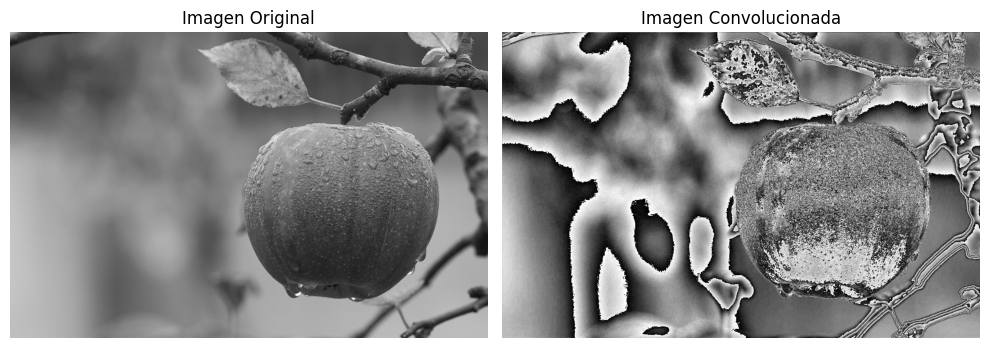

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Cargar la imagen en escala de grises
img = Image.open('imagen_clase6.jpg').convert('L')
img_array = np.array(img)

# Definir el kernel
kernel = np.array([[1, 0],
                   [3, 1]])

# Obtener dimensiones de la imagen y el kernel
img_h, img_w = img_array.shape
kernel_h, kernel_w = kernel.shape

# Calcular el padding necesario para mantener el tamaño original
pad_h = kernel_h // 2
pad_w = kernel_w // 2

# Añadir padding a la imagen
padded_img = np.pad(img_array, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

# Crear una matriz para almacenar el resultado
result = np.zeros_like(img_array)

# Realizar la convolución manualmente
for i in range(img_h):
    for j in range(img_w):
        # Extraer la región de la imagen que coincide con el tamaño del kernel
        region = padded_img[i:i+kernel_h, j:j+kernel_w]
        # Multiplicar elemento a elemento y sumar
        result[i, j] = np.sum(region * kernel)

# Mostrar la imagen original y la imagen convolucionada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(img_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Imagen Convolucionada")
plt.imshow(result, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Guardar la imagen convolucionada
Image.fromarray(result).save('imagen_convolucionada_manual.jpg')

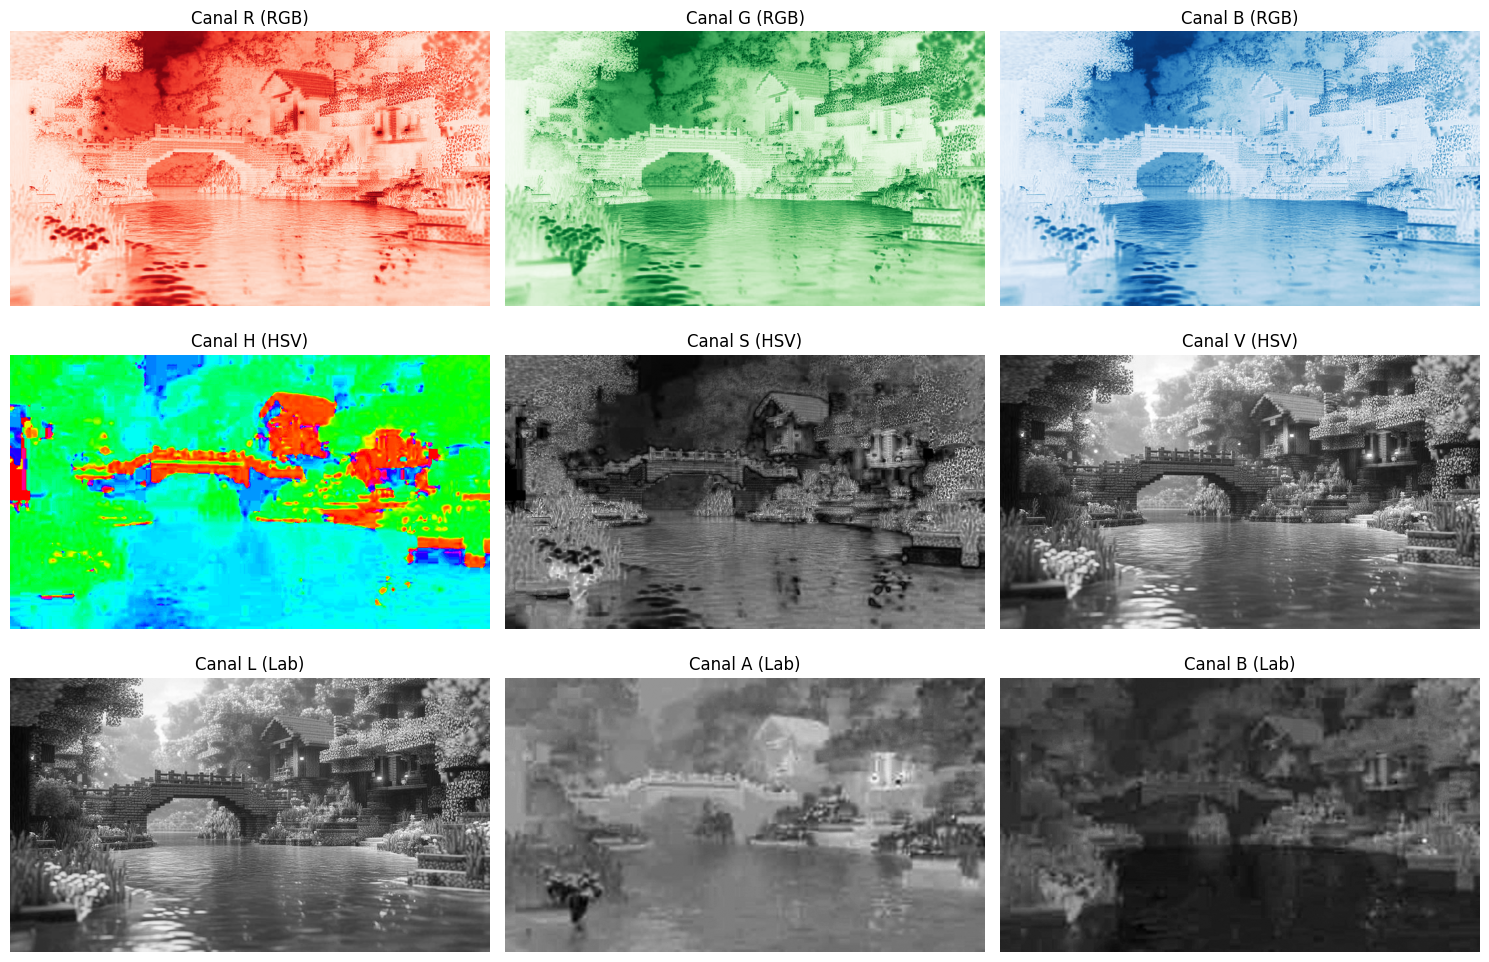

[ 82 122  80]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  

img = cv2.imread('contraste.jpeg', 1)  

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab) 
r, g, b = cv2.split(img_rgb) 
h, s, v = cv2.split(img_hsv)  
l, a, bb = cv2.split(img_lab)  

# Mostrar los canales RGB
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
plt.title("Canal R (RGB)")
plt.imshow(r, cmap='Reds')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title("Canal G (RGB)")
plt.imshow(g, cmap='Greens')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title("Canal B (RGB)")
plt.imshow(b, cmap='Blues')
plt.axis('off')

# Mostrar los canales HSV
plt.subplot(3, 3, 4)
plt.title("Canal H (HSV)")
plt.imshow(h, cmap='hsv')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.title("Canal S (HSV)")
plt.imshow(s, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.title("Canal V (HSV)")
plt.imshow(v, cmap='gray')
plt.axis('off')

# Mostrar los canales Lab
plt.subplot(3, 3, 7)
plt.title("Canal L (Lab)")
plt.imshow(l, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.title("Canal A (Lab)")
plt.imshow(a, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.title("Canal B (Lab)")
plt.imshow(bb, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

pixel_value = img[100, 100]
print(pixel_value)
img[:,:,0] = 0  # Eliminar canal azul
img[:,:,1] = 0  # Eliminar canal verde
#img[:,:,2] = 0  # Eliminar canal rojo
cv2.imshow('Imagen sin azul y verde', img)
cv2.waitKey(0)
cv2.destroyAllWindows()